In [1]:
# Standard Libraries

# Anaconda
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix, multilabel_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns

### Load Data and EDA

In [ ]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00640/Occupancy_Estimation.csv")
df.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [ ]:
# Combine date and time into a single timestamp
timestamp = pd.to_datetime(df["Date"].astype(str) + df["Time"], format="%Y/%m/%d%H:%M:%S")
df.insert(0, "Timestamp", timestamp)
df.drop(columns=["Date", "Time"], inplace=True)

In [ ]:
df.count()

Timestamp               10129
S1_Temp                 10129
S2_Temp                 10129
S3_Temp                 10129
S4_Temp                 10129
S1_Light                10129
S2_Light                10129
S3_Light                10129
S4_Light                10129
S1_Sound                10129
S2_Sound                10129
S3_Sound                10129
S4_Sound                10129
S5_CO2                  10129
S5_CO2_Slope            10129
S6_PIR                  10129
S7_PIR                  10129
Room_Occupancy_Count    10129
dtype: int64

In [ ]:
df.dtypes

Timestamp               datetime64[ns]
S1_Temp                        float64
S2_Temp                        float64
S3_Temp                        float64
S4_Temp                        float64
S1_Light                         int64
S2_Light                         int64
S3_Light                         int64
S4_Light                         int64
S1_Sound                       float64
S2_Sound                       float64
S3_Sound                       float64
S4_Sound                       float64
S5_CO2                           int64
S5_CO2_Slope                   float64
S6_PIR                           int64
S7_PIR                           int64
Room_Occupancy_Count             int64
dtype: object

In [ ]:
df.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


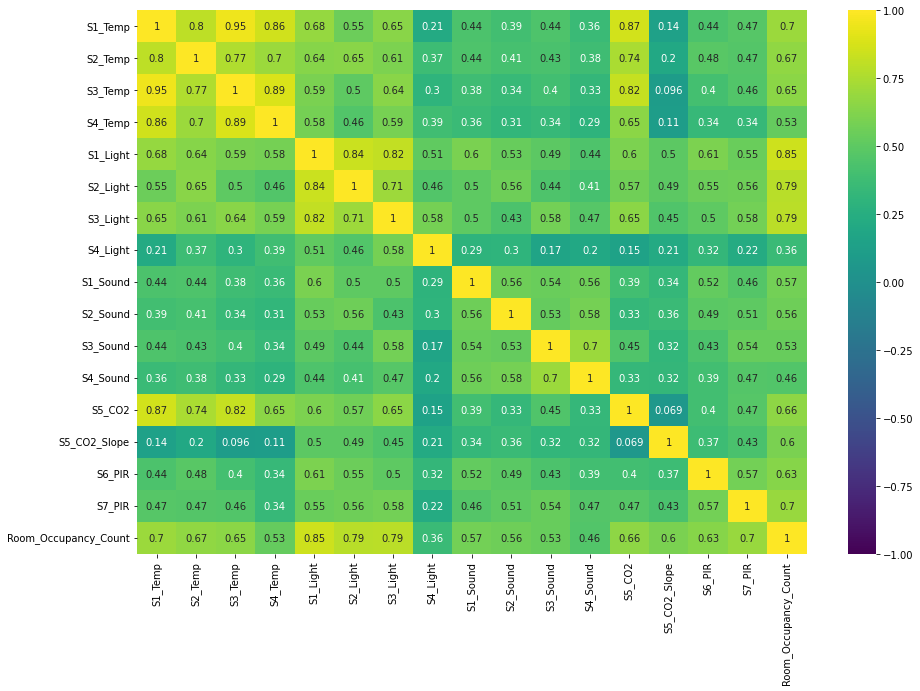

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(data=df.corr(), vmin=-1, vmax=1, cmap="viridis", annot=True, ax=ax)
plt.show()

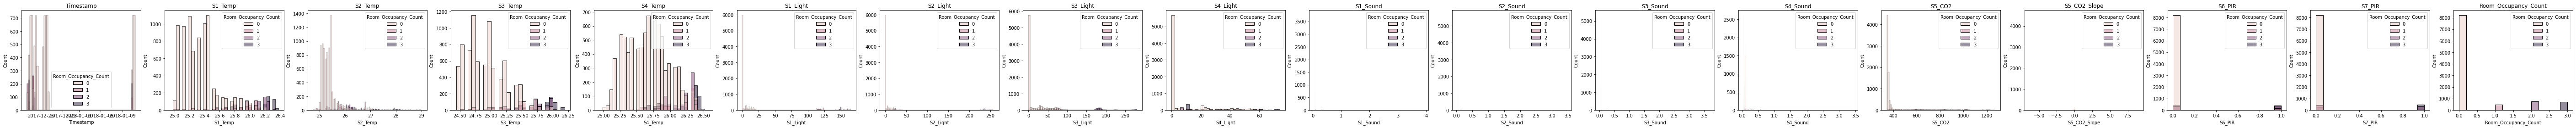

In [ ]:
fig, axes = plt.subplots(1, len(df.columns), figsize=(100, 4))

for ax, col in zip(axes, df.columns):
  sns.histplot(df, x=col, hue="Room_Occupancy_Count", ax=ax)
  ax.title.set_text(col)

plt.show()

### Feature Engineering

In [ ]:
min_occupied_time = df[df["Room_Occupancy_Count"].ge(1)]["Timestamp"].dt.time.min()
max_occupied_time = df[df["Room_Occupancy_Count"].ge(1)]["Timestamp"].dt.time.max()

min_unoccupied_time = df[df["Room_Occupancy_Count"] == 0]["Timestamp"].dt.time.min()
max_unoccupied_time = df[df["Room_Occupancy_Count"] == 0]["Timestamp"].dt.time.max()

print(f"Min/Max Occupied Time: {min_occupied_time}/{max_occupied_time}")
print(f"Min/Max Unoccupied Time: {min_unoccupied_time}/{max_unoccupied_time}")

Min/Max Occupied Time: 10:49:41/19:51:46
Min/Max Unoccupied Time: 00:00:28/23:59:58


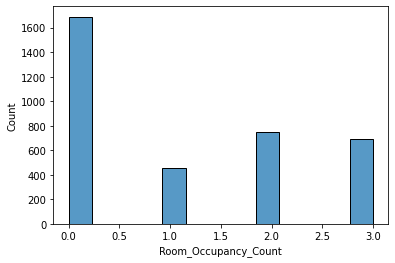

In [ ]:
sns.histplot(df[df["Timestamp"].dt.time.between(min_occupied_time, max_occupied_time)]["Room_Occupancy_Count"])
plt.show()

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


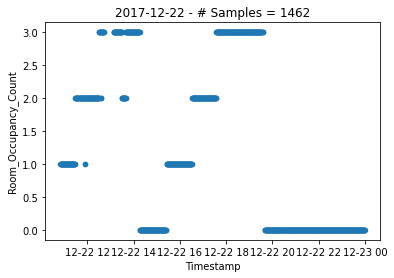

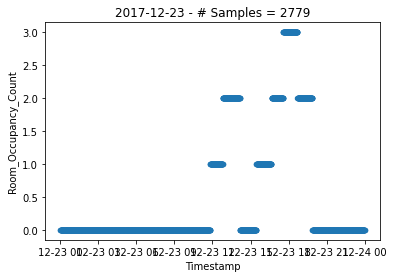

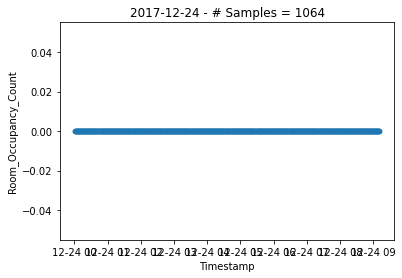

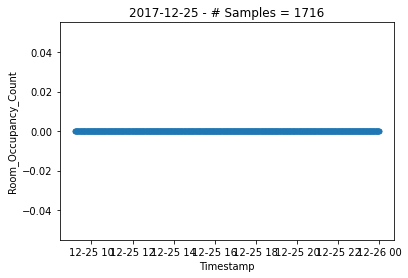

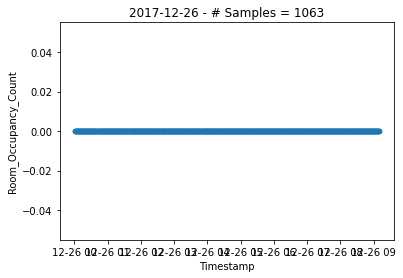

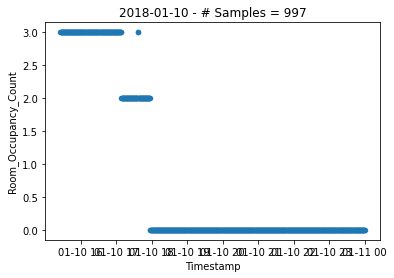

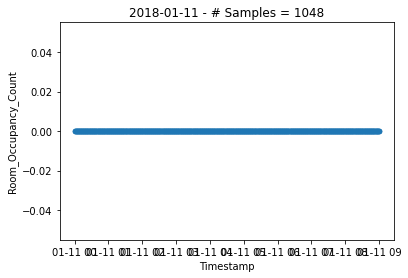

In [ ]:
for date in df["Timestamp"].dt.date.unique():
  subset = df[df["Timestamp"].dt.date == date]
  subset.plot(x="Timestamp", y="Room_Occupancy_Count", kind="scatter")
  plt.title(f"{date} - # Samples = {len(subset)}")
  plt.show()

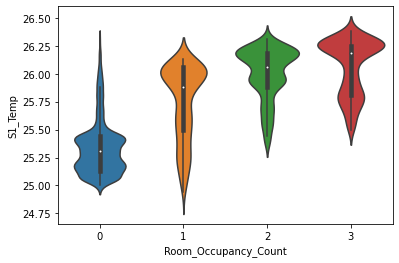

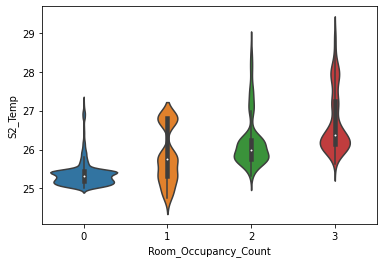

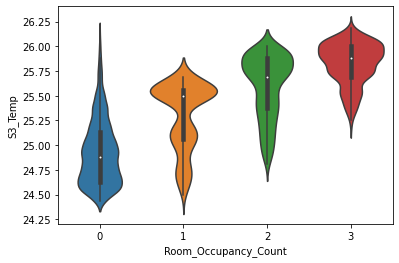

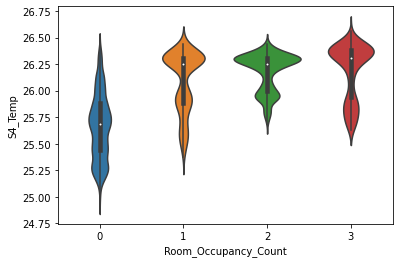

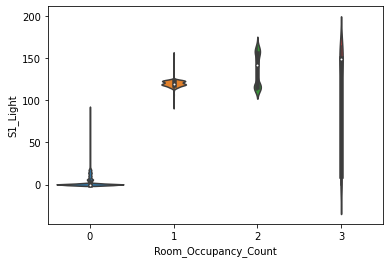

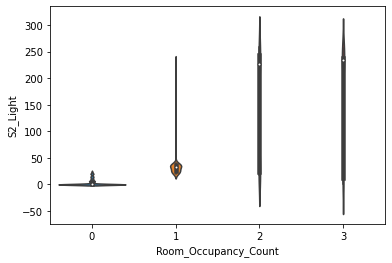

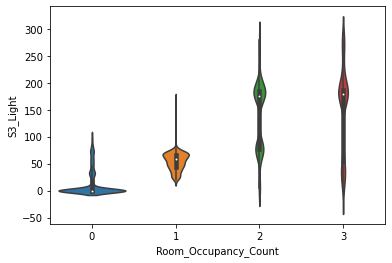

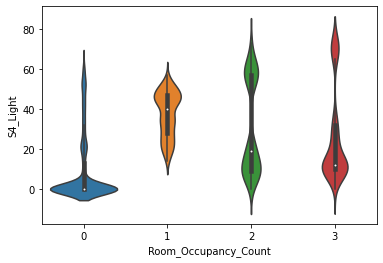

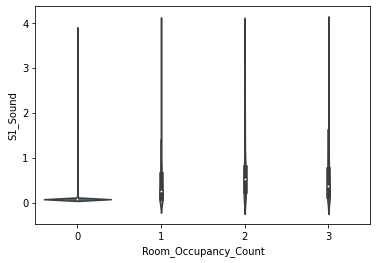

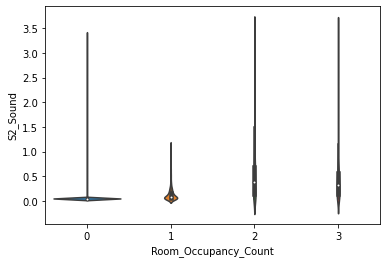

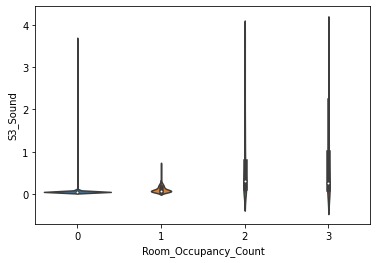

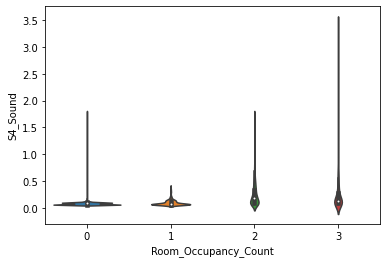

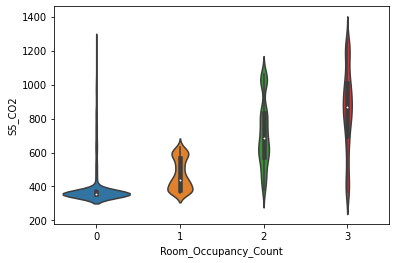

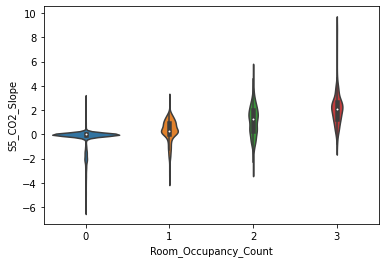

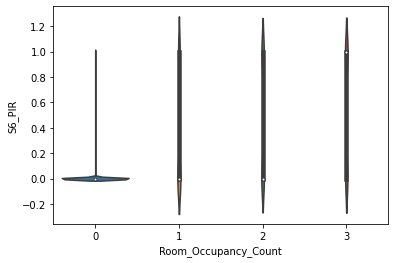

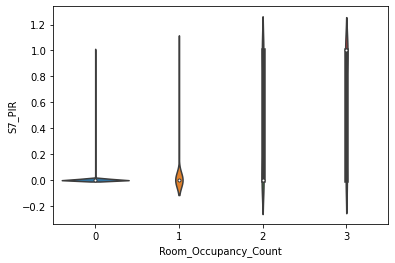

In [ ]:
for column in df.columns:
  if column in ["Timestamp", "Room_Occupancy_Count"]:
    continue
  sns.violinplot(data=df, x="Room_Occupancy_Count", y=column, split=True)
  plt.show()

### Train/Validation/Train Split

In [ ]:
def split_data(X, y, split=(0.6, 0.2, 0.2), seed=888):
  """
  Splits X/y into training, validation, and testing sets based on the
  specified split.

  Parameters
  ----------
  X : np.ndarray
    An array-like collection of sample points
  y : np.ndarray
    The class labels of the data, should match the length of data
  split : tuple
    The percentage allocation of training, validation, and test datasets

  Returns
  -------
  splits : tuple
    The training, validation, and test datasets with their labels
  """
  # Input checking
  if len(X) != len(y):
    raise ValueError(f"X and y lengths don't match ({len(X)} != {len(y)})")
  if len(split) != 3:
    raise ValueError("Invalid split, expected 3 percentages (training, validation, test)")
  if sum(split) != 1:
    raise ValueError(f"Invalid split {split}, percentages must sum to 1!")
  if not isinstance(X, np.ndarray) or not isinstance(y, np.ndarray):
    raise TypeError("X and y must be numpy arrays")

  # Initial split for testing data
  X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=split[2], random_state=seed, stratify=y)

  # Further split for validation data
  val_size = split[1] / (1 - split[2])
  X_train, X_val, y_train, y_val = train_test_split(
      X_train, y_train, test_size=val_size, random_state=seed, stratify=y_train)

  return X_train, X_val, X_test, y_train, y_val, y_test

In [ ]:
# Generate numpy arrays of data
X = df[list(df.columns)[:-1]].values # Exclude Room_Occupancy_Count
y = df["Room_Occupancy_Count"].values

X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)

In [ ]:
print(f"Length of original dataset: {len(X)}")
print()
print(f"Length of X_train/y_train: {len(X_train)}/{len(y_train)}")
print(f"Length of X_val/y_train: {len(X_val)}/{len(y_val)}")
print(f"Length of X_test/y_train: {len(X_test)}/{len(y_test)}")
print()
print(f"Resulting split: ({len(X_train)/len(X):.2f}, {len(X_val)/len(X):.2f}, {len(X_test)/len(X):.2f})")

Length of original dataset: 10129

Length of X_train/y_train: 6077/6077
Length of X_val/y_train: 2026/2026
Length of X_test/y_train: 2026/2026

Resulting split: (0.60, 0.20, 0.20)


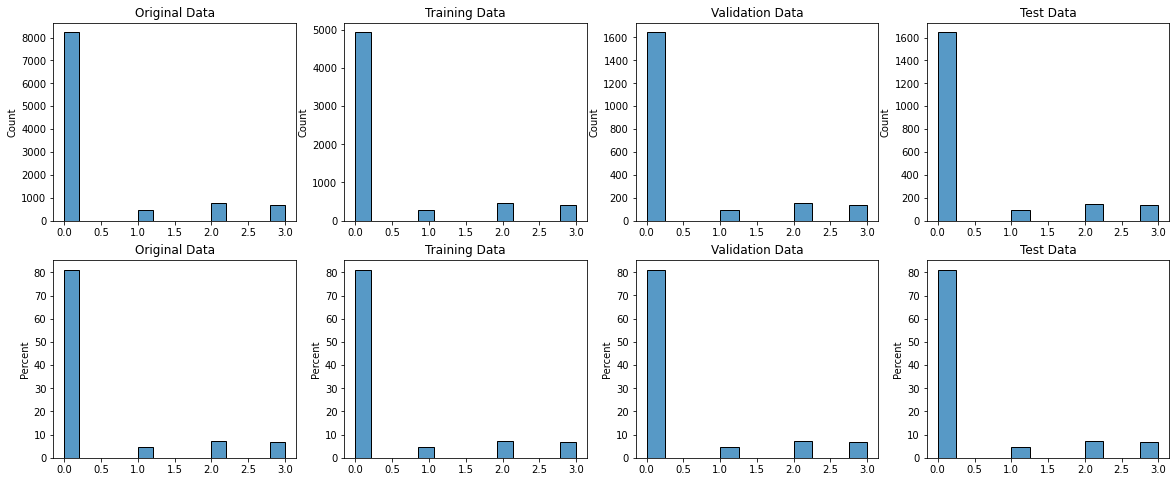

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

sns.histplot(df["Room_Occupancy_Count"], ax=axes[0, 0])
sns.histplot(y_train, ax=axes[0, 1])
sns.histplot(y_val, ax=axes[0, 2])
sns.histplot(y_test, ax=axes[0, 3])

sns.histplot(df["Room_Occupancy_Count"], stat="percent", ax=axes[1, 0])
sns.histplot(y_train, stat="percent", ax=axes[1, 1])
sns.histplot(y_val, stat="percent", ax=axes[1, 2])
sns.histplot(y_test, stat="percent", ax=axes[1, 3])

for ax, label in zip(axes[0], ["Original Data", "Training Data", "Validation Data", "Test Data"]):
  ax.set_title(label)
for ax, label in zip(axes[1], ["Original Data", "Training Data", "Validation Data", "Test Data"]):
  ax.set_title(label)

for ax in axes.flatten():
  ax.set_xlabel("")

plt.show()

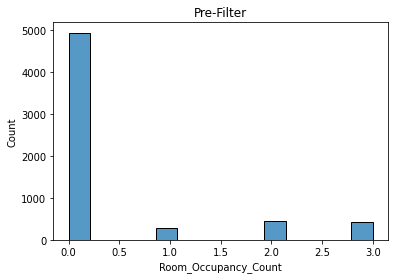

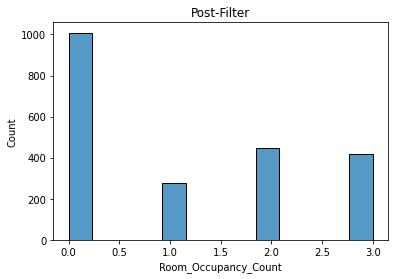

In [ ]:
X_train_df = pd.DataFrame(X_train, columns=df.columns[:-1])
X_train_df["Room_Occupancy_Count"] = y_train

fig, ax = plt.subplots()
hist = sns.histplot(X_train_df["Room_Occupancy_Count"])
plt.bar_label(hist.containers[0], labels=[str(label) if label else "" for label in hist.containers[0].datavalues])
plt.title("Pre-Filter")
plt.show()

fig, ax = plt.subplots()
hist = sns.histplot(X_train_df[X_train_df["Timestamp"].dt.time.between(min_occupied_time, max_occupied_time)]["Room_Occupancy_Count"])
plt.bar_label(hist.containers[0], labels=[str(label) if label else "" for label in hist.containers[0].datavalues])
plt.title("Post-Filter")
plt.show()

In [ ]:
X_train = X_train_df[X_train_df["Timestamp"].dt.time.between(min_occupied_time, max_occupied_time)][X_train_df.columns[1:-1]].values
y_train = X_train_df[X_train_df["Timestamp"].dt.time.between(min_occupied_time, max_occupied_time)]["Room_Occupancy_Count"].values

# Get rid of timestamp columns
X_val = X_val[:, 1:]
X_test = X_test[:, 1:]

# Pipeline

In [2]:
def split_data(X, y, split=(0.6, 0.2, 0.2), seed=888):
  """
  Splits X/y into training, validation, and testing sets based on the
  specified split.

  Parameters
  ----------
  X : np.ndarray
    An array-like collection of sample points
  y : np.ndarray
    The class labels of the data, should match the length of data
  split : tuple
    The percentage allocation of training, validation, and test datasets

  Returns
  -------
  splits : tuple
    The training, validation, and test datasets with their labels
  """
  # Input checking
  if len(X) != len(y):
    raise ValueError(f"X and y lengths don't match ({len(X)} != {len(y)})")
  if len(split) != 3:
    raise ValueError("Invalid split, expected 3 percentages (training, validation, test)")
  if sum(split) != 1:
    raise ValueError(f"Invalid split {split}, percentages must sum to 1!")
  if not isinstance(X, np.ndarray) or not isinstance(y, np.ndarray):
    raise TypeError("X and y must be numpy arrays")

  # Initial split for testing data
  X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=split[2], random_state=seed, stratify=y)

  # Further split for validation data
  val_size = split[1] / (1 - split[2])
  X_train, X_val, y_train, y_val = train_test_split(
      X_train, y_train, test_size=val_size, random_state=seed, stratify=y_train)

  return X_train, X_val, X_test, y_train, y_val, y_test

In [3]:
def calculate_specificities(true_labels, predicted_labels, labels=[0, 1, 2, 3]):
    """
    Calculates the macro average specificity, micro average specificity and weighted average specificity
    from the given true and predicted labels

    Parameters
    ----------
    true_labels : np.ndarray
        An array-like collection of the true labels a model is trying to predict
    predicted_labels : np.ndarray
        An array-like collection of the predicted labels output from a model
    labels : list
        The set of unique class labels in the given classification problem
        Default: [0, 1, 2, 3]

    Returns
    -------
    macro_avg_specificity : float
        The macro average specificity for the model. The function calculates specificity for each class individually
        and takes the unweighted mean of all values    
    micro_avg_specificity : float
        The micro average specificity for the model. The function considers the total True Negatives (TN) and total False Positives (FP)
        amongst all classes and calculates specificity globally for the model
    weighted_avg_specificity: float
        The support weighted average specificity for the model. The function calculates specificity for each class individually
        and takes the weighted mean of all values based on the support of each class
    
    """

    # Calculate TN / TP / FN / FP
    mcm = multilabel_confusion_matrix(true_labels, predicted_labels, labels=labels)
    TN = mcm[:,0,0]
    TP = mcm[:,1,1]
    FN = mcm[:,1,0]
    FP = mcm[:,0,1]

    # Calculate specificity for each class (TN/(TN+FP))
    specificity = TN / (TN+FP)
    print('\nspecificity for each class [0, 1, 2, 3]:', specificity)

    # calculate macro specificity
    macro_avg_specificity = round((sum(specificity)/len(specificity)),5)

    # calculate micro specificity
    micro_avg_specificity = round((sum(TN)/(sum(TN)+sum(FP))),5)
    
    support = np.unique(true_labels, return_counts=True)[1]
    weights = support/sum(support)
    weighted_avg_specificity = round(sum(specificity*weights),5)

    return macro_avg_specificity, micro_avg_specificity, weighted_avg_specificity

In [4]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00640/Occupancy_Estimation.csv")

# Combine date and time into a single timestamp
timestamp = pd.to_datetime(df["Date"].astype(str) + df["Time"], format="%Y/%m/%d%H:%M:%S")
df.insert(0, "Timestamp", timestamp)
df.drop(columns=["Date", "Time"], inplace=True)

# Find min/max occupied times
min_occupied_time = df[df["Room_Occupancy_Count"] == 1]["Timestamp"].dt.time.min()
max_occupied_time = df[df["Room_Occupancy_Count"] == 1]["Timestamp"].dt.time.max()

# Generate numpy arrays of data
X = df[list(df.columns)[:-1]].values # Exclude Room_Occupancy_Count
y = df["Room_Occupancy_Count"].values

X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)

# Downsample due to class imbalance
mask_func = np.vectorize(lambda x: (x.time() > min_occupied_time) & (x.time() < max_occupied_time))
mask = mask_func(X_train[:, 0])

X_train = X_train[mask]
y_train = y_train[mask]

# Get rid of timestamp columns
X_train = X_train[:, 1:]
X_val = X_val[:, 1:]
X_test = X_test[:, 1:]

# Standardize data
std_scaler = StandardScaler()

X_train_std = std_scaler.fit(X_train).transform(X_train)
X_val_std = std_scaler.fit(X_train).transform(X_val)
X_test_std = std_scaler.fit(X_train).transform(X_test)

# Save off data
features = df.columns[:-1]
labels = df.columns[-1]

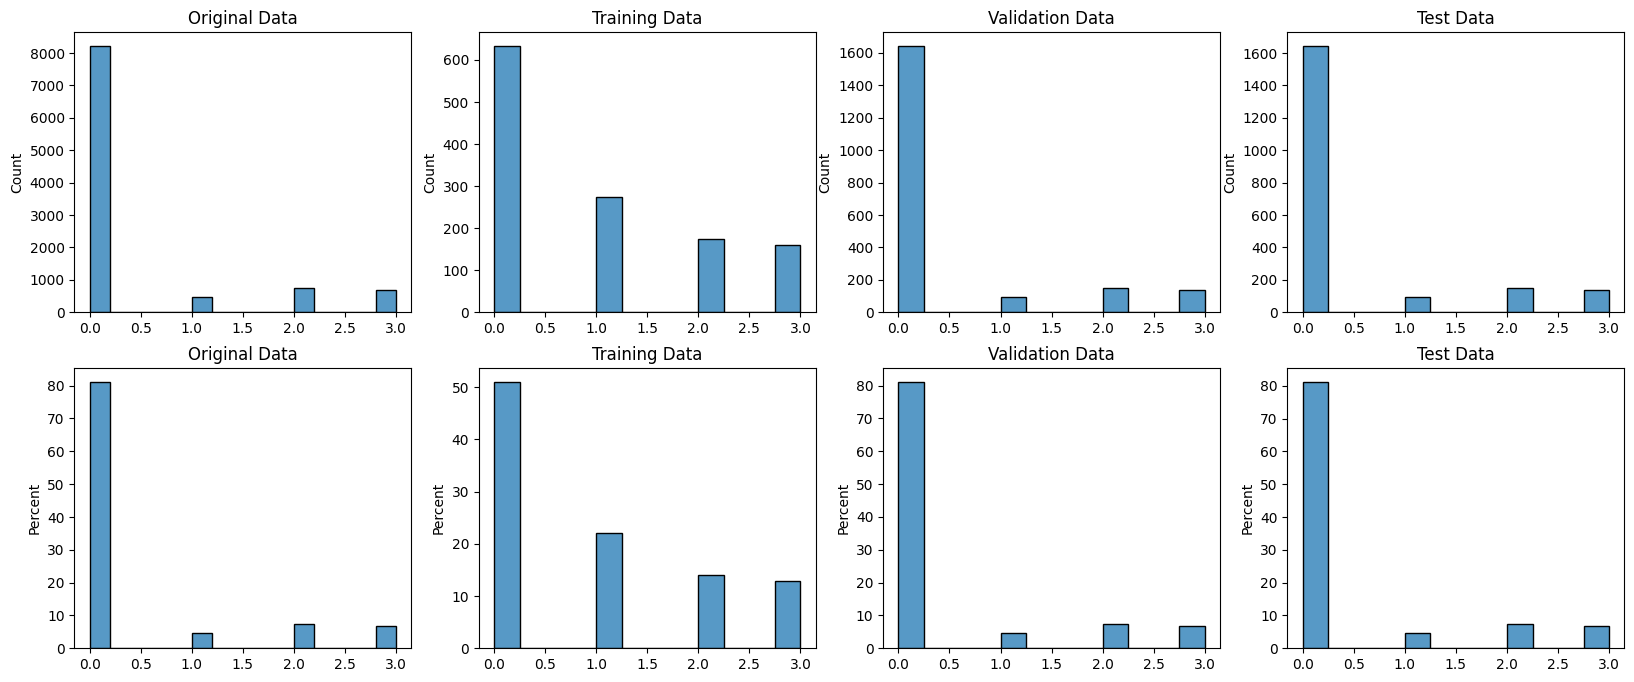

In [5]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

sns.histplot(df["Room_Occupancy_Count"], ax=axes[0, 0])
sns.histplot(y_train, ax=axes[0, 1])
sns.histplot(y_val, ax=axes[0, 2])
sns.histplot(y_test, ax=axes[0, 3])

sns.histplot(df["Room_Occupancy_Count"], stat="percent", ax=axes[1, 0])
sns.histplot(y_train, stat="percent", ax=axes[1, 1])
sns.histplot(y_val, stat="percent", ax=axes[1, 2])
sns.histplot(y_test, stat="percent", ax=axes[1, 3])

for ax, label in zip(axes[0], ["Original Data", "Training Data", "Validation Data", "Test Data"]):
  ax.set_title(label)
for ax, label in zip(axes[1], ["Original Data", "Training Data", "Validation Data", "Test Data"]):
  ax.set_title(label)

for ax in axes.flatten():
  ax.set_xlabel("")

plt.show()

### Baseline Model

In [6]:
# Baseline model always predicts Room_Occupancy_Count == 0
baseline_pred = np.zeros(y_test.shape)

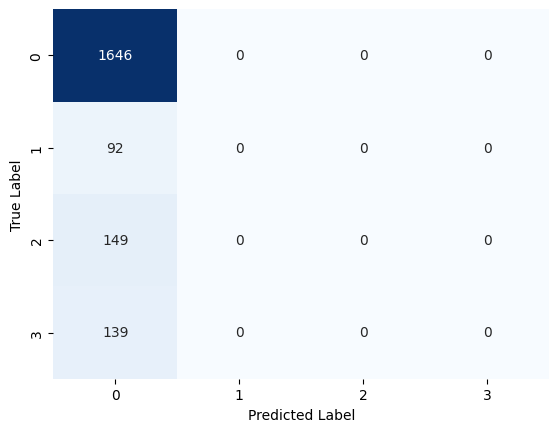

In [7]:
sns.heatmap(confusion_matrix(y_test, baseline_pred), annot=True, fmt="g", cmap="Blues", cbar=False)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [9]:
calculate_specificities(y_test, baseline_pred)


specificity for each class [0, 1, 2, 3]: [0. 1. 1. 1.]


(0.75, 0.93748, 0.18756)

In [8]:
f1_score(y_test, baseline_pred, average="weighted")

0.7283624429260571

### Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [11]:
tree = DecisionTreeClassifier(criterion="entropy", random_state=888)
tree.fit(X_train, y_train)

y_val_pred = tree.predict(X_val)

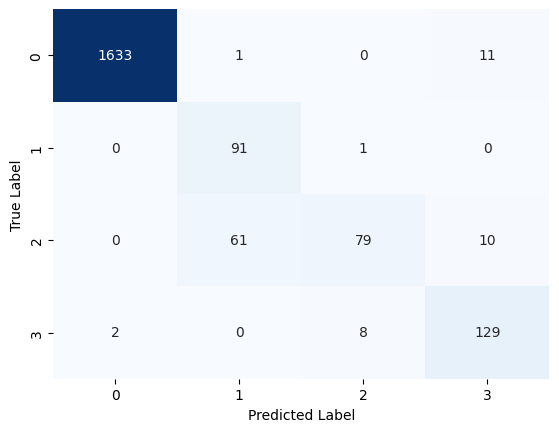

In [12]:
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, fmt="g", cmap="Blues", cbar=False)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [13]:
calculate_specificities(y_val, y_val_pred)


specificity for each class [0, 1, 2, 3]: [0.99475066 0.96794209 0.99520256 0.98887122]


(0.98669, 0.98453, 0.99316)

In [14]:
f1_score(y_val, y_val_pred, average="weighted")

0.9526117043485387

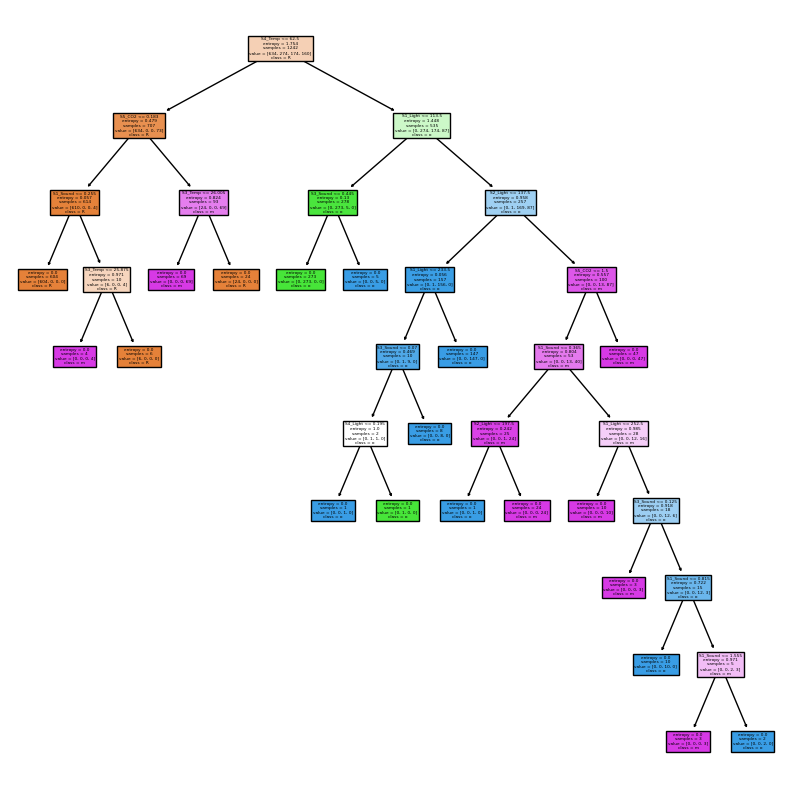

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_tree(tree, feature_names=features, class_names=labels, filled=True, ax=ax)
plt.show()

### Logistic Regression

https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile

https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit

https://www.tensorflow.org/api_docs/python/tf/keras/metrics

In [16]:
!pip install -U tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import tensorflow as tf
import tensorflow_addons as tfa

/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.12.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [18]:
def plot_history(history):
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.xticks(range(0, len(history['loss'] + 1)))
  plt.plot(history['loss'], label="training", marker='o')
  plt.plot(history['val_loss'], label="validation", marker='o')
  plt.legend()
  plt.show()

In [19]:
def logistic_regression(optimizer="Adam", learning_rate=0.001, random_seed=888):
  # Initialization
  tf.keras.backend.clear_session()
  tf.random.set_seed(random_seed)

  # Build model
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(units=4, activation="softmax"))

  # Initialize optimizer
  optimizer = tf.keras.optimizers.get(optimizer)
  optimizer.lr.assign(learning_rate)
  
  model.compile(
    loss="categorical_crossentropy", 
    optimizer=optimizer, 
    metrics=tfa.metrics.F1Score(num_classes=4, average="weighted")
  )
  return model

In [20]:
model = logistic_regression()

history = model.fit(
  X_train_std,
  tf.one_hot(indices=y_train, depth=4),
  batch_size=32,
  epochs=10,
  validation_data=(X_val_std, tf.one_hot(indices=y_val, depth=4)),
  shuffle=True,
  verbose=False
)

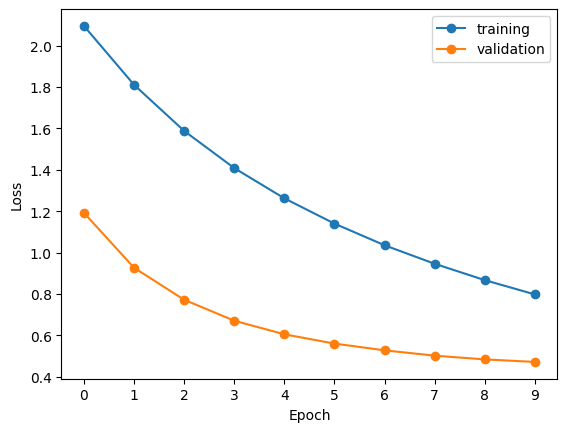

In [21]:
history = pd.DataFrame(history.history)
plot_history(history)

In [22]:
y_val_pred = np.argmax(model.predict(X_val_std), axis=-1)

64/64 [==============================] - 0s 1ms/step


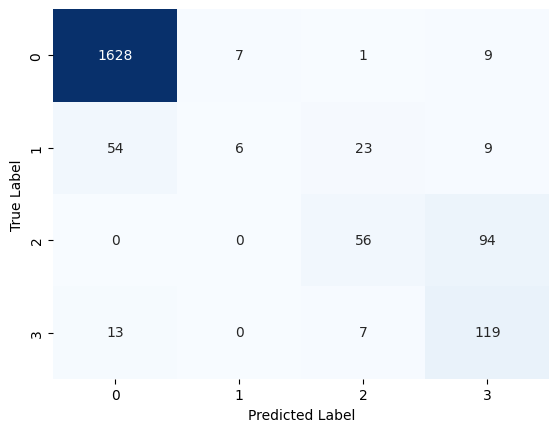

In [23]:
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, fmt="g", cmap="Blues", cbar=False)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [24]:
calculate_specificities(y_val, y_val_pred)


specificity for each class [0, 1, 2, 3]: [0.82414698 0.99638056 0.98347548 0.94064653]


(0.93616, 0.9643, 0.85176)

In [25]:
f1_score(y_val, y_val_pred, average="weighted")

0.8758341140125536